In [1]:
import scanpy as sc
import pandas as pd
import statistics
import sys
import getopt
import os
import matplotlib.pyplot as mp
import anndata as ad
import time
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
sc.settings.figdir = "../results/figures/"
print(ad.__version__)
print(sc.__version__)

0.10.7
1.10.1


In [3]:
filenames = "input.txt"
files = open(filenames, "r")
files = [i.strip() for i in files]
print(len(files))

142


In [3]:
samplesheet = pd.read_table("../data/tables/ASAP_samplesheet_no_hypoxic.tab")
samplesheet = samplesheet.reset_index()
samplesheet = samplesheet.set_index("Sample")
samplesheet

,index,Patient,Dx,Region,PMI,Age,Braak,Sex,Seqnum,Cohort,Note
Sample,,,,,,,,,,,
AA_ASAP100_ctrl_NP18-148_PUT,0,NP18-00148,Ctl,PUT,28,88,0,F,CTG_JGJSeq273_240_10X_2023_231,2,NaN
AA_ASAP101_PD_NP21-57_SN,1,NP21-00057,PD,SN,28,82,4,F,CTG_JGJSeq273_240_10X_2023_231/0_fastq,2,NaN
AA_ASAP102_PD_NP21-208_SN,2,NP21-00208,PD,SN,87,81,6,M,CTG_JGJSeq273_240_10X_2023_231/0_fastq,2,NaN
AA_ASAP103_PD_NP21-217_SN,3,NP21-00217,PD,SN,43,84,6,F,CTG_JGJSeq273_240_10X_2023_231/0_fastq,2,NaN
AA_ASAP104_ctrl_NP16-119_SN,4,NP16-00119,Ctl,SN,74,74,0,M,CTG_JGJSeq275_276_277_279_2023_252NovaseqX,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
DA811_ASAP18_PD_NP16-140_AMY,137,NP16-140,PD,AMY,NaN,71,NaN,M,CTG_JGJSeq163B_165A,1,NaN
DA812_ASAP43_PD_NP19-108_AMY,138,NP19-108,PD,AMY,NaN,86,NaN,F,CTG_JGJSeq163B_165A,1,NaN
DA813_ASAP17_PD_NP16-140_PFC,139,NP16-140,PD,PFC,NaN,71,NaN,M,CTG_JGJSeq163B_165A,1,NaN


In [5]:
adatas = []
i = 0
samplesheet = pd.read_table("../data/tables/ASAP_samplesheet_no_hypoxic.tab")
samplesheet = samplesheet.reset_index()
samplesheet = samplesheet.set_index("Sample")

for file in files:
    sample_name = file.split("/")[8]
    adata = sc.read_10x_mtx(file, var_names = "gene_symbols", cache = True)
    adata.obs["sample_name"] = sample_name
    adata.obs["patient"] = samplesheet.loc[sample_name]["Patient"]
    adata.obs["cohort"] = samplesheet.loc[sample_name]["Cohort"]
    adata.obs["region"] = samplesheet.loc[sample_name]["Region"]
    adata.obs["sex"] = samplesheet.loc[sample_name]["Sex"]
    adata.obs["age"] = samplesheet.loc[sample_name]["Age"]
    adata.obs["pmi"] = samplesheet.loc[sample_name]["PMI"]
    adata.obs["braak"] = samplesheet.loc[sample_name]["Braak"]
    adata.obs["batch"] = samplesheet.loc[sample_name]["Seqnum"]
    adata.obs["dx"] = samplesheet.loc[sample_name]["Dx"]
    adatas.append(adata)
    i = i+1
    print(str(i) + "/142") # Removed 4 samples from NP17-94 and 4 samples from NP22-00075

1/142
2/142
3/142
4/142
5/142
6/142
7/142
8/142
9/142
10/142
11/142
12/142
13/142
14/142
15/142
16/142
17/142
18/142
19/142
20/142
21/142
22/142
23/142
24/142
25/142
26/142
27/142
28/142
29/142
30/142
31/142
32/142
33/142
34/142
35/142
36/142
37/142
38/142
39/142
40/142
41/142
42/142
43/142
44/142
45/142
46/142
47/142
48/142
49/142
50/142
51/142
52/142
53/142
54/142
55/142
56/142
57/142
58/142
59/142
60/142
61/142
62/142
63/142
64/142
65/142
66/142
67/142
68/142
69/142
70/142
71/142
72/142
73/142
74/142
75/142
76/142
77/142
78/142
79/142
80/142
81/142
82/142
83/142
84/142
85/142
86/142
87/142
88/142
89/142
90/142
91/142
92/142
93/142
94/142
95/142
96/142
97/142
98/142
99/142
100/142
101/142
102/142
103/142
104/142
105/142
106/142
107/142
108/142
109/142
110/142
111/142
112/142
113/142
114/142
115/142
116/142
117/142
118/142
119/142
120/142
121/142
122/142
123/142
124/142
125/142
126/142
127/142
128/142
129/142
130/142
131/142
132/142
133/142
134/142
135/142
136/142
137/142
138/142
139/

In [6]:
# Number of cells
sum([len(adata) for adata in adatas])

336096

In [7]:
i = 0
adatas_raw = adatas
#adatas = adatas_raw
for adata in adatas:
    adata.var_names_make_unique()
    sc.pp.filter_genes(adata, min_cells = 3)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
    sc.pp.calculate_qc_metrics(adata, qc_vars = ["mt", "ribo"], percent_top = None, log1p = False, inplace = True)
    mean_counts = statistics.mean(adata.obs.n_genes_by_counts)
    sd_counts = statistics.stdev(adata.obs.n_genes_by_counts)
    sc.pp.scrublet(adata)
    i = i + 1
    print(str(i) + "/142 " + adata.obs.sample_name.unique().item() + " : " + str(len(adata)))

1/142 AA71_ASAP70_PD_NP18-304_PUT : 1619
2/142 AA73_ASAP65_PD_NP16-269_PUT : 1135
3/142 AA74_ASAP62_PD_NP16-140_PUT : 3038
4/142 AA76_ASAP74_PD_NP19-255_PUT : 1185
5/142 AA77_ASAP61_PD_NP16-25_PUT : 2101
6/142 AA78_ASAP63_PD_NP16-160_PUT : 703
7/142 AA79_ASAP64_PD_NP16-162_PUT : 2907
8/142 AA81_ASAP67_PD_NP17-191_PUT : 1671
9/142 AA82_ASAP68_PD_NP18-117_PUT : 1236
10/142 AA83_ASAP69_PD_NP18-287_PUT : 1921
11/142 AA84_ASAP71_PD_NP19-16_PUT : 3697
12/142 AA85_ASAP72_PD_NP19-23_PUT : 1374
13/142 AA86_ASAP73_PD_NP19-108_PUT : 1425
14/142 AA87_ASAP76_ctrl_NP18-159_PUT : 2866
15/142 AA88_ASAP77_ctrl_NP19-36_PUT : 1882
16/142 AA89_ASAP78_ctrl_NP19-37_PUT : 1391
17/142 AA_ASAP100_ctrl_NP18-148_PUT : 5526
18/142 AA_ASAP101_PD_NP21-57_SN : 3431
19/142 AA_ASAP102_PD_NP21-208_SN : 2495
20/142 AA_ASAP103_PD_NP21-217_SN : 3509
21/142 AA_ASAP104_ctrl_NP16-119_SN : 2208
22/142 AA_ASAP105_ctrl_NP16-293_SN : 1659


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


23/142 AA_ASAP106_ctrl_NP17-20_AMY : 4230
24/142 AA_ASAP107_ctrl_NP17-216_SN : 420
25/142 AA_ASAP108_ctrl_NP18-148_SN : 2859
26/142 AA_ASAP109_PD_NP21-217_AMY : 1682
27/142 AA_ASAP110_ctrl_NP16-119_AMY : 3299
28/142 AA_ASAP111_ctrl_NP16-284_AMY : 434
29/142 AA_ASAP112_ctrl_NP16-293_AMY : 1929
30/142 AA_ASAP113_ctrl_NP18-148_AMY : 3221
31/142 AA_ASAP114_PD_NP21-57_AMY : 3405
32/142 AA_ASAP115_PD_NP21-208_AMY : 2421
33/142 AA_ASAP116_PD_NP22-55_PFC : 2241
34/142 AA_ASAP117_PD_NP22-55_PUT : 2814
35/142 AA_ASAP118_PD_NP22-55_SN : 2267
36/142 AA_ASAP119_PD_NP22-55_AMY : 1866
37/142 AA_ASAP120_PD_NP16-285_AMY : 573
38/142 AA_ASAP121_PD_NP17-232_AMY : 1229
39/142 AA_ASAP123_ctrl_NP19-218_AMY : 2735
40/142 AA_ASAP124_ctrl_NP22-37_AMY : 1583
41/142 AA_ASAP126_PD_NP19-137_AMY : 12132
42/142 AA_ASAP127_ctrl_NP19-218_SN : 3554
43/142 AA_ASAP128_PD_NP21-04_AMY : 1050
44/142 AA_ASAP129_ctrl_NP22-37_SN : 14112
45/142 AA_ASAP131_PD_NP23-21_AMY : 1414
46/142 AA_ASAP132_PD_NP16-285_SN : 652
47/142 AA_AS

In [8]:
adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
adata.layers["counts"] = adata.X 
adata.obs_names_make_unique()

/tmp/ipykernel_3818305/3893152556.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
df = sc.get.obs_df(adata, ['sample_name','region','n_genes_by_counts', "total_counts", "pct_counts_mt"])
df["sample_name"] = df.sample_name.astype(str)
df.to_csv('../results/tables/preQC_cellMeta.csv')
df

,sample_name,region,n_genes_by_counts,total_counts,pct_counts_mt
AAACCCAAGAGGATCC-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,4714,11452.0,0.977995
AAACCCAAGGTAAGTT-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,5505,19718.0,0.294147
AAACCCACAGTCCGTG-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,3684,8151.0,1.214575
AAACGAAAGCCGTTGC-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,8009,44141.0,0.933373
AAACGAAAGCGTATGG-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,6000,18006.0,0.505387
...,...,...,...,...,...
TTTGATCGTTGCAAGG-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,1529,2675.0,0.000000
TTTGGTTAGGTAATCA-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,1054,1565.0,0.063898
TTTGGTTCAAATAGCA-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,3294,8331.0,0.048013
TTTGGTTGTCGAATGG-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,1256,1968.0,0.355691


In [11]:
import statistics
with open("../results/tables/ASAP_QC.txt","a") as fout:
    for i in range(0,len(adatas)):
        fout.write(str(i) + "/142 " + adatas[i].obs.sample_name.unique().item() + " pre QC: " + str(len(adatas[i].obs_names)) + "\n")
        fout.write(adatas[i].obs.sample_name.unique().item() + " pre QC: " + str(len(adatas[i])) + "\n")
        sc.pp.filter_cells(adatas[i], min_genes = 500, inplace = True)
        fout.write("Discading cells with less than 500 genes\n")
        fout.write(adatas[i].obs.sample_name.unique().item() + " with > 500 genes: " + str(len(adatas[i])) + "\n")
        mean_counts = statistics.mean(adatas[i].obs.total_counts)
        sd_counts = statistics.stdev(adatas[i].obs.total_counts)
        discarded = ((adatas[i].obs.total_counts  < (mean_counts - (sd_counts * 2))) | (adatas[i].obs.total_counts > (mean_counts + (sd_counts * 2))))
        keep_cells = [cell for cell in (adatas[i].obs_names.to_list()) if cell not in discarded[discarded].index.to_list()]
        adatas[i] = adatas[i][keep_cells, :]
        fout.write("Discarding cells with < mean-2sd counts and > mean+2sd counts. Total: " + str(len(discarded[discarded].index.to_list())) + ". Kept: " + str(len(keep_cells)) + " or " + str(len(adatas[i])) + "\n")
        discarded = (adatas[i].obs.pct_counts_mt > 2)
        keep_cells = [cell for cell in (adatas[i].obs_names.to_list()) if cell not in discarded[discarded].index.to_list()]
        adatas[i] = adatas[i][keep_cells, :]
        fout.write("Discarding cells with >2 mt_counts: " + str(len(discarded[discarded].index.to_list())) + ". Kept: " + str(len(adatas[i])) + "\n")
        discarded = (adatas[i].obs.predicted_doublet == True)
        keep_cells = [cell for cell in (adatas[i].obs_names.to_list()) if cell not in discarded[discarded].index.to_list()]
        adatas[i] = adatas[i][keep_cells, :]
        fout.write("Discarding doublets: " + str(len(discarded[discarded].index.to_list())) + ". Kept: " + str(len(adatas[i])) + "\n")
        fout.write(adatas[i].obs.sample_name.unique().item() + " post QC: " + str(len(adatas[i])) + "\n")


In [12]:
print(len(adatas))
adatas = [a for a in adatas if len(a) > 50]
print(len(adatas))

142
139


In [13]:
adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
adata.layers["counts"] = adata.X 
adata.obs_names_make_unique()

/tmp/ipykernel_3818305/3893152556.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
from pathlib import Path
from scipy import io

adata.layers["counts"] = adata.X
adata.write_h5ad("./h5s/ASAP_adata_preumap.h5")
io.mmwrite('./data_scanpy/counts_unscaled.mtx',adata.layers['counts'])

In [15]:
sc.pp.normalize_total(adata, target_sum = 1e6)
sc.pp.log1p(adata)
adata.layers["normalized"] = adata.X 
adata.obs.batch = adata.obs.batch.astype('category')
adata.obs["batch_num"] = adata.obs.batch.cat.codes
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

In [16]:
sc.pp.scale(adata, max_value = 10)
adata.layers["scaled"] = adata.X 
sc.tl.pca(adata, svd_solver = "arpack")
sc.pp.neighbors(adata, n_neighbors = 15, n_pcs = 20)
sc.tl.leiden(adata, resolution = 0.1, random_state = 0, n_iterations = -1, directed = False, flavor = "igraph")
sc.tl.paga(adata)
sc.pl.paga(adata, plot = False)
sc.tl.umap(adata, init_pos = "paga")

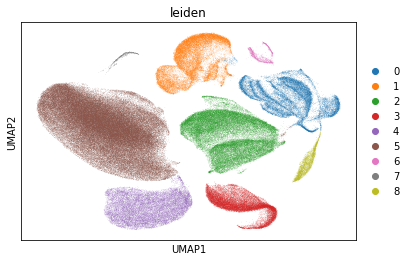

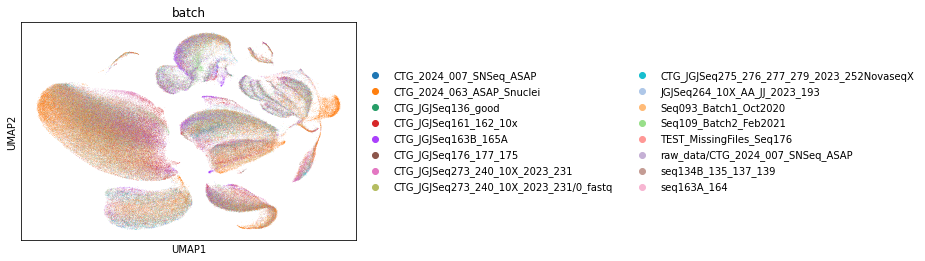

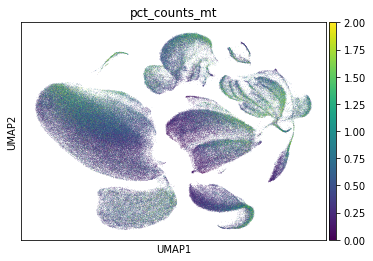

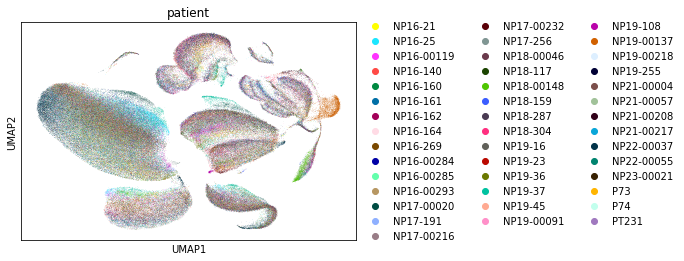

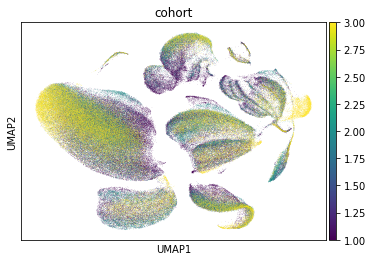

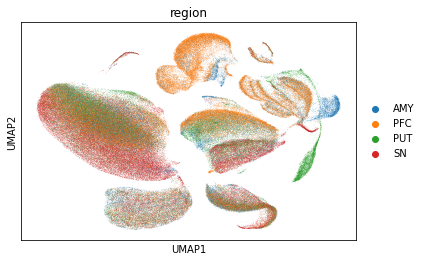

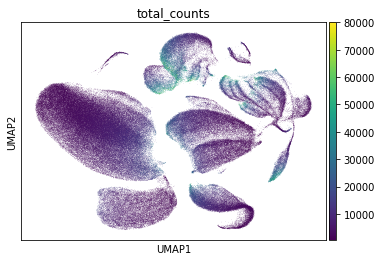

In [18]:
sc.pl.umap(adata, color = "leiden", save = "_nointegration_clusters.pdf")
sc.pl.umap(adata, color = 'batch', save = "_nointegration_batch.pdf")
sc.pl.umap(adata, color = 'pct_counts_mt', save = "_nointegration_mt.pdf")
sc.pl.umap(adata, color = 'patient', save = "_nointegration_patient.pdf")
sc.pl.umap(adata, color = 'cohort', save = "_nointegration_cohort.pdf")
sc.pl.umap(adata, color = 'region', save = "_nointegration_region.pdf")
sc.pl.umap(adata, color = 'total_counts', save = "_nointegration_counts.pdf")

In [19]:
with open("ASAP_samples_mean_count_genes.tab", "w") as fout:
    for sample in adata.obs.sample_name.unique():
        fout.write(sample + "\t" + str(samplesheet.loc[sample]["Cohort"]) + "\t" + str(len(adata[adata.obs.sample_name.isin([str(sample)])].obs_names.unique())) + "\t" + str(adata[adata.obs.sample_name.isin([str(sample)])].obs.n_genes_by_counts.mean()) + "\t" + str(adata[adata.obs.sample_name.isin([str(sample)])].obs.total_counts.mean()) + "\n")

In [3]:
#adata = ad.read_h5ad("./h5s/ASAP_adata_umap_integration.h5")
adata.write_h5ad("./h5s/ASAP_adata_umap_nointegration.h5")

In [ ]:
sc.external.pp.harmony_integrate(adata = adata, key = ["batch", "patient", "sex"])
sc.pp.neighbors(adata, n_neighbors = 15, n_pcs = 20, use_rep = 'X_pca_harmony')
sc.tl.leiden(adata, resolution = 0.1, random_state = 0, n_iterations = -1, directed = False, flavor = "igraph")
sc.tl.paga(adata)
sc.pl.paga(adata, plot = False)
sc.tl.umap(adata, init_pos = "paga")

sc.pl.umap(adata, color = 'leiden')

2025-03-18 16:25:36,771 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-18 16:25:49,634 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-18 16:25:50,438 - harmonypy - INFO - Iteration 1 of 10
2025-03-18 16:27:39,274 - harmonypy - INFO - Iteration 2 of 10
2025-03-18 16:29:22,626 - harmonypy - INFO - Iteration 3 of 10
2025-03-18 16:31:04,800 - harmonypy - INFO - Converged after 3 iterations


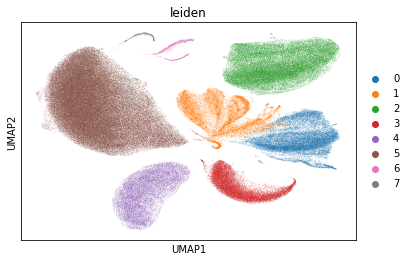

In [5]:
sc.pl.umap(adata, color = 'leiden', save = "_integration_batch_patient_clusters.pdf")

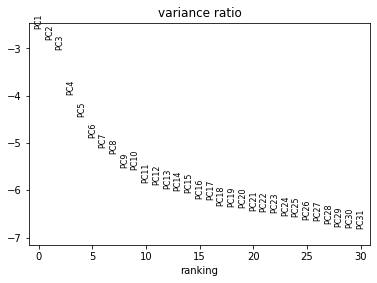

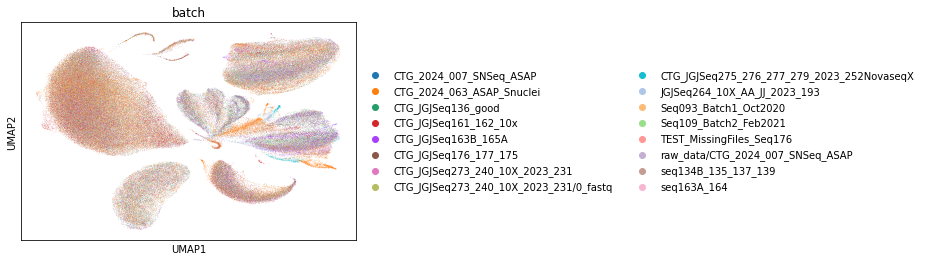

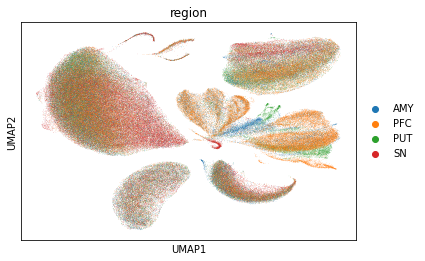

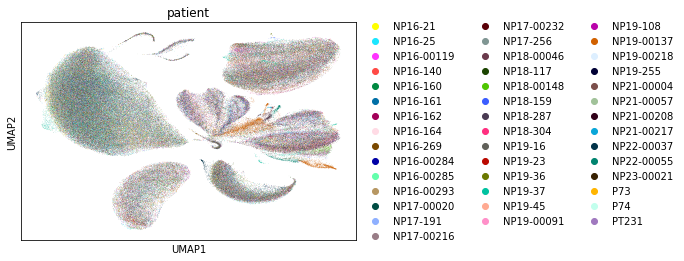

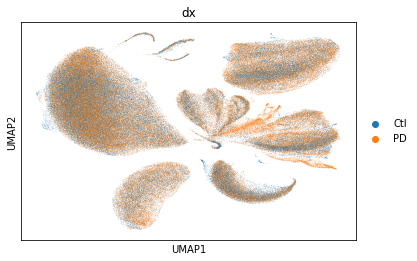

In [6]:
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.umap(adata, color = 'batch', save = "_integration_batch_patient_batch.pdf")
sc.pl.umap(adata, color = 'region', save = "_integration_batch_patient_region.pdf")
sc.pl.umap(adata, color = 'patient', save = "_integration_batch_patient_patient.pdf")
sc.pl.umap(adata, color = 'dx', save = "_integration_batch_patient_dx.pdf")
#adata.write_h5ad("ASAP_adata_umap_integration.h5")

In [7]:
df = sc.get.obs_df(adata, ['leiden', 'sample_name','patient','region','sex','age', 'pmi', 'braak', 'batch', 'dx','n_genes_by_counts', "total_counts", "pct_counts_mt"])
df.to_csv('../results/tables/ASAP_QC.csv')
cell_meta=adata.obs.copy()
cell_meta['Barcode'] = cell_meta.index
cell_meta['UMAP1'] = adata.obsm['X_umap'][:,0]
cell_meta['UMAP2'] = adata.obsm['X_umap'][:,1]


gene_meta=adata.var.copy()
gene_meta['GeneName']=gene_meta.index
cell_meta.to_csv('../results/tables/counts_cellMeta_integrated_umap.csv',index=None)
gene_meta.to_csv('../results/tables/counts_geneMeta_integrated_umap.csv',index=None)


In [8]:
#adata = ad.read_h5ad("ASAP_adata_umap_integration.h5")
with open("input_postQC.txt", "a") as fout:
    fout.write('\n'.join(adata.obs.sample_name.unique()) + "\n")

len(adata.obs.sample_name.unique())

139

In [5]:
adata = ad.read_h5ad("./h5s/ASAP_adata_umap_integration.h5")

In [13]:
df = sc.get.obs_df(adata, ['sample_name','region','n_genes_by_counts', "total_counts", "pct_counts_mt", "cell_type", "dx"])
df["sample_name"] = df.sample_name.astype(str)
df.to_csv('../results/tables/postQC_cellMeta.csv')
df

,sample_name,region,n_genes_by_counts,total_counts,pct_counts_mt,cell_type,dx
AAACCCAAGAGGATCC-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,4714,11452.0,0.977995,0_ExcNeurons,PD
AAACCCAAGGTAAGTT-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,5505,19718.0,0.294147,2_Astrocytes,PD
AAACCCACAGTCCGTG-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,3684,8151.0,1.214575,1_InhNeurons,PD
AAACGAAAGCGTATGG-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,6000,18006.0,0.505387,0_ExcNeurons,PD
AAACGAACAGAAGCTG-1,AA71_ASAP70_PD_NP18-304_PUT,PUT,2076,3546.0,0.253807,2_Astrocytes,PD
...,...,...,...,...,...,...,...
TTTGATCGTTGCAAGG-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,1529,2675.0,0.000000,5_Oligodendrocytes,Ctl
TTTGGTTAGGTAATCA-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,1054,1565.0,0.063898,2_Astrocytes,Ctl
TTTGGTTCAAATAGCA-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,3294,8331.0,0.048013,2_Astrocytes,Ctl
TTTGGTTGTCGAATGG-1,MJ_ASAP6_ctrl_NP16-164_SN,SN,1256,1968.0,0.355691,4_Microglia,Ctl
